<h1>Unsupervised Learning</h1>

Unsupervised learning is a type of machine learning where the algorithm is given a dataset without explicit instructions on what to do with it. The system tries to learn the patterns, relationships, and structures within the data on its own, without labeled outputs or predefined target values.

In unsupervised learning, the algorithm explores the inherent structure of the data to find hidden patterns or representations. The goal is often to discover the underlying structure, group similar data points, or reduce the dimensionality of the data. Clustering and dimensionality reduction are common tasks in unsupervised learning.

Two main types of unsupervised learning are:

- **Clustering:** The algorithm identifies groups of similar instances in the data, grouping them together based on certain features or characteristics. Examples of clustering algorithms include k-means clustering and hierarchical clustering.

- **Dimensionality Reduction:** The algorithm aims to reduce the number of features or variables in the dataset while retaining the essential information. Principal Component Analysis (PCA) is a popular technique for dimensionality reduction.

Unsupervised learning is in contrast to supervised learning, where the algorithm is trained on labeled data with explicit input-output pairs. Unsupervised learning is often used in situations where labeled data is scarce or unavailable, and the goal is to explore and understand the structure of the data.


<table width="100%" border="0">
<tr>
    <td width="50%">
        <img src="https://drive.google.com/uc?id=1CX3c3HHeNnO3YZKaHkv8VxieS4orVkAx" />
        <div align="center">Supervised learning example: Classification Problem</div>
    </td>
    <td>
        <img src="https://drive.google.com/uc?id=1ZjxzgE5bnXa4668F6WxODz_EOm3TO3Yq" />
        <div align="center">Unsupervised learning example: Clustering Problem</div>
    </td>
</tr>
</table>

Supervised learning and unsupervised learning are two fundamental approaches in machine learning, and they differ primarily in the way they use labeled or unlabeled data for training.

**Supervised Learning:**
- **Training Data:**
    - **Labeled Data:** Supervised learning relies on a labeled training dataset, where each input is associated with a corresponding output or target. The algorithm learns to map inputs to specific outputs based on the provided labels.
- **Objective:**
    - **Prediction:** The main goal of supervised learning is to make accurate predictions or classifications for new, unseen data points based on the patterns learned during training.
- **Examples:**
    - **Classification:** Identifying which category or class an input belongs to (e.g., spam or not spam, image classification).
Regression: Predicting a continuous output variable (e.g., predicting house prices).

**Unsupervised Learning:**
- **Training Data:**
    - **Unlabeled Data:** Unsupervised learning works with unlabeled data, where the algorithm is given a dataset without explicit instructions on what the output should be.
- **Objective:**
    - **Discover Patterns:** The primary goal is to explore the inherent structure of the data, uncover hidden patterns, or find relationships between data points without predefined outputs.
- **Examples:**
    - **Clustering:** Grouping similar data points together based on certain features.
    - **Dimensionality Reduction:** Reducing the number of features while retaining important information.
    - **Association:** Discovering relationships and associations between variables in the data.

<table width="100%" border="0">
<tr>
    <td align="center" width="33%">
        <img src="https://drive.google.com/uc?id=1Ggrd6BTc4ifEdm67df5Iv68naBney059" />
        <div>Market Segmentation</div>
    </td>
    <td align="center" width="33%">
        <img src="https://drive.google.com/uc?id=1vR1IBxfI5wk2rwW98OMW_s-CJE1StpwB" />
        <div>Organize computing clusters</div>
    </td>
    <td align="center">
        <img src="https://drive.google.com/uc?id=1gYpGhsAtIX-vSGRSqZtmILxrEpJUMsqU" />
        <div>Organize computing clusters</div>
    </td>
</tr>
</table>

## K-Means Clustering Algorithm

### Inputs:
- **Dataset:** $ X = \{x_1, x_2, \ldots, x_n\} $ - a set of $n$ data points in a feature space.

- **Number of Clusters:** $k$ - the desired number of clusters to partition the dataset into.

### Algorithm Steps:

1. **Initialization:**
    - Choose the number of clusters, $k$.
    - Randomly initialize $k$ cluster centroids: $\{c_1, c_2, \ldots, c_k\}$, where each centroid $c_i$ is a point in the feature space.

2. **Assignment Step:**
    - For each data point $x_j$ in the dataset, calculate the distance to each centroid:
        $ d_{ij} = \|x_j - c_i\| $
    - Assign the data point $x_j$ to the cluster with the nearest centroid:
        $ \text{cluster}(x_j) = \underset{i}{\text{argmin }} d_{ij} $

3. **Update Step:**
    - Recalculate the centroids of the clusters based on the data points assigned to them. The new centroid $c_i$ is the mean of all the points in the cluster:
        $$ c_i = \frac{1}{N_i} \sum_{x_j \in \text{cluster}(c_i)} x_j $$
        where $N_i$ is the number of data points in cluster $i$.

4. **Repeat:**
    - Repeat steps 2 and 3 until convergence. Convergence occurs when the assignment of data points to clusters and the update of centroids no longer change significantly.

### Outputs:
- **Cluster Assignments:** A set of cluster labels for each data point, indicating which cluster it belongs to.

- **Cluster Centroids:** The final positions of the $k$ centroids after convergence.

The algorithm seeks to partition the dataset into $k$ clusters, with each cluster represented by a centroid. The assignment step allocates each data point to the cluster associated with the nearest centroid, and the update step adjusts the centroids based on the mean of the points in each cluster. The process is iterated until convergence.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

print(X.shape)
print(X[:10])

(300, 2)
[[-7.33898809 -7.72995396]
 [-7.74004056 -7.26466514]
 [-1.68665271  7.79344248]
 [ 4.42219763  3.07194654]
 [-8.91775173 -7.8881959 ]
 [ 5.49753846  1.81323115]
 [-2.3360167   9.39960351]
 [ 5.05281029  1.40944513]
 [-2.98837186  8.82862715]
 [-3.70050112  9.67083974]]


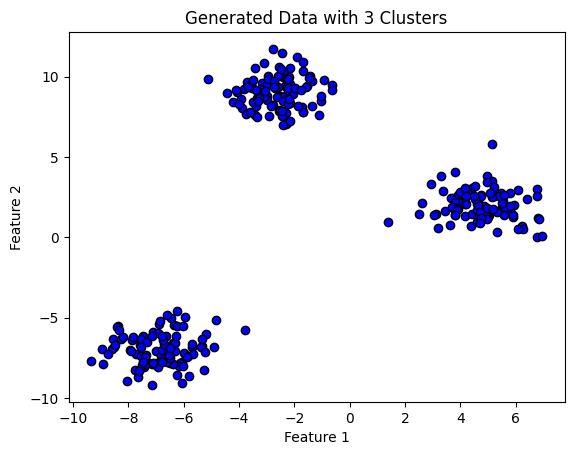

In [ ]:
# Plot the generated data
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolors='black')
plt.title('Generated Data with 3 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


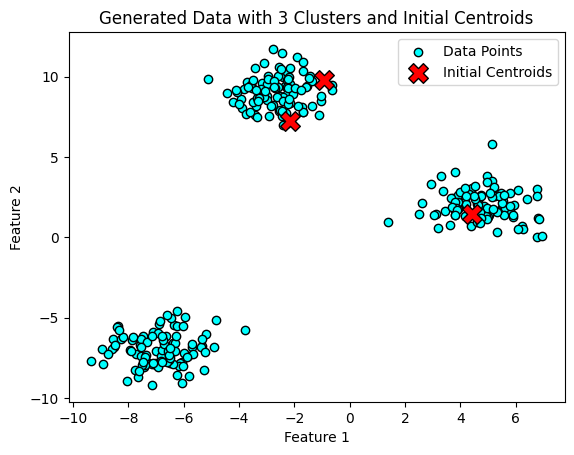

In [ ]:
# Initialize random centroids
np.random.seed(42)
k = 3  # Number of clusters
centroids = X[np.random.randint(0, len(X), size=k)]

# Plot the generated data and initial centroids
plt.scatter(X[:, 0], X[:, 1], c='cyan', marker='o', edgecolors='black', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', edgecolors='black', marker='X', s=200, label='Initial Centroids')
plt.title('Generated Data with 3 Clusters and Initial Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

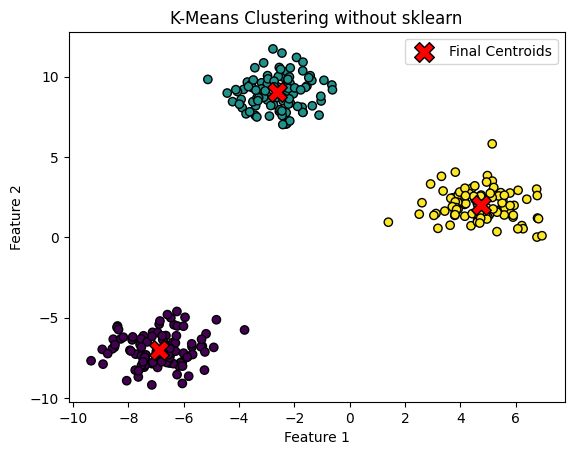

In [ ]:
# Function to assign each point to the nearest centroid
def assign_to_clusters(X, centroids):
    squared_distances = np.sum((X - centroids[:, np.newaxis])**2, axis=2)
    labels = np.argmin(squared_distances, axis=0)
    return labels

# Function to update centroids based on the mean of points in each cluster
def update_centroids(X, labels, k):
    new_centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids


# K-Means clustering algorithm
max_iters = 100
for _ in range(max_iters):
    # Assignment step
    cluster_labels = assign_to_clusters(X, centroids)
    # Update step
    new_centroids = update_centroids(X, cluster_labels, k)
    # Check for convergence
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

# Plot the final clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', edgecolors='black', s=200, label='Final Centroids')
plt.title('K-Means Clustering without sklearn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


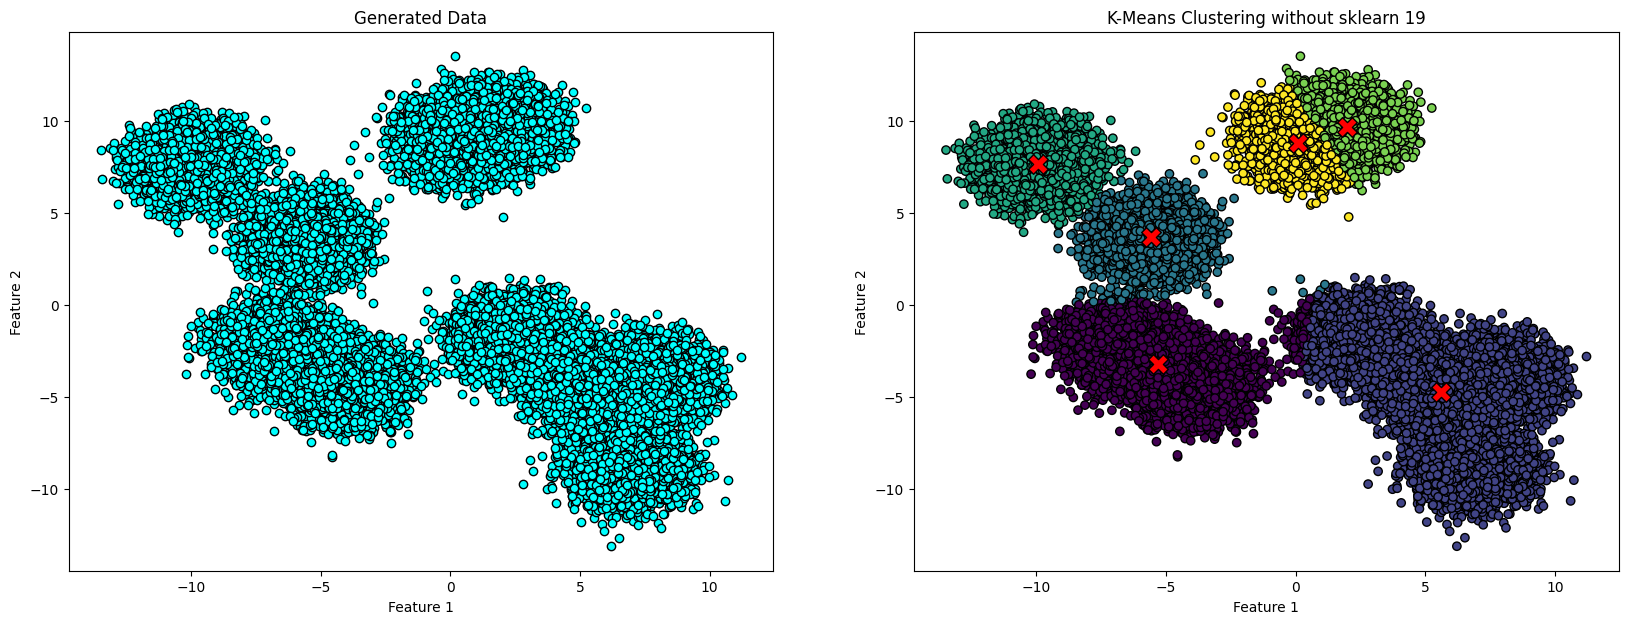

In [ ]:
from IPython import display
import time

X, _ = make_blobs(n_samples=50000, centers=10, random_state=23)
k = 6
centroids = X[np.random.randint(0, len(X), size=k)]

# K-Means clustering algorithm
max_iters = 20
for i in range(max_iters):
    plt.figure(figsize=(20,7))
    display.clear_output(wait=True)

    # Clear the entire figure
    plt.clf()

    # Plot the first subplot
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c='cyan', marker='o', edgecolors='black')
    # plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', edgecolors='black', s=200, label='Final Centroids')
    plt.title('Generated Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the second subplot
    plt.subplot(1,2,2)

    cluster_labels = assign_to_clusters(X, centroids)
    new_centroids = update_centroids(X, cluster_labels, k)
    centroids = new_centroids
    # Plot the final clusters
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', edgecolors='black', s=200, label='Final Centroids')
    plt.title(f'K-Means Clustering without sklearn {i}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    time.sleep(0.5)

    plt.show()

**Advantages of K-means Clustering:**

1. *Simplicity and Ease of Implementation:*
   - K-means is a simple and easy-to-understand clustering algorithm. Its straightforward nature makes it accessible and quick to implement, making it an attractive choice for many applications.

2. *Efficiency and Scalability:*
   - With a linear time complexity of $O(tkn)$, where $n$ is the number of data points, $k$ is the number of clusters, and $t$ is the number of iterations, K-means is computationally efficient. This efficiency allows it to scale well and handle large datasets, making it suitable for real-time and large-scale applications.

3. *Versatility and Applicability:*
   - K-means is versatile and applicable to a wide range of data types, including numerical and categorical data. It can handle various cluster shapes, making it suitable for diverse datasets and domains.

4. *Convergence and Guaranteed Solution:*
   - K-means guarantees convergence to a solution. Although the final result may depend on the initial placement of centroids, running the algorithm multiple times with different initializations can help achieve a more stable solution.

5. *Adaptability to Different Distance Metrics:*
   - The algorithm can be adapted to various distance metrics, such as Euclidean, Manhattan, or cosine distance, making it flexible and applicable to different types of features.

6. *Scalability to Large Datasets:*
   - K-means efficiently handles large datasets, as its time complexity is linear with respect to the number of data points. This scalability is beneficial for applications dealing with significant amounts of information.

7. *Interpretability:*
   - The results of K-means clustering are often easy to interpret. Each cluster is represented by its centroid, providing a clear understanding of the grouping structure, which is valuable for communication with stakeholders.

The advantages of K-means clustering, including its simplicity, efficiency, versatility, and interpretability, contribute to its widespread use in various fields and applications.


**Weaknesses of K-means Clustering:**

1. *Sensitivity to Initial Centroid Placement:*
   - K-means is sensitive to the initial placement of centroids. Different initializations can lead to different final clusters, impacting the stability and reliability of the results. To mitigate this, the algorithm is often run multiple times with different initializations.
    <table>
    <tr>
        <td width="50%"><img src="https://drive.google.com/uc?id=1VnSDVDmuXOUxVe69sRk48tUzHvVpxEw8" /></td>
        <td width="50%"><img src="https://drive.google.com/uc?id=1LqXrQekxtmA2vpzZfUuA1MFOWXAmkDf4" /></td>
    </tr>
    </table>

2. *Dependence on the Number of Clusters (k):*
   - The user must specify the number of clusters (k) in advance. Choosing an inappropriate value for k can lead to suboptimal results. Various techniques, such as the elbow method or silhouette analysis, are used to help determine an optimal value for k, but the process is not always straightforward.

3. *Assumption of Spherical Clusters:*
   - K-means assumes that clusters are spherical and equally sized, which may not accurately represent the structure of the data in some cases. It performs poorly on datasets with non-spherical or unevenly sized clusters.
    ![alt text](https://drive.google.com/uc?id=1iBmQ0xkIDSPK2sa8rStcrAD_58mB5IBJ)

4. *Sensitive to Outliers:*
   - K-means is sensitive to outliers, as they can disproportionately influence the position of the centroids. Outliers may result in clusters that do not accurately reflect the underlying patterns in the majority of the data.
   
    ![alt text](https://drive.google.com/uc?id=1edD9v-awVhwHedNXKCt6xeLLIZFagmiL)

    One method is to remove some data points in the clustering process that are much further away from the centroids than other data points.
    - To be safe, we may want to monitor these possible outliers over a few iterations and then decide to remove them.
    
    Another method is to perform random sampling. Since in sampling we only choose a small subset of the data points, the chance of selecting an outlier is very small.
    - Assign the rest of the data points to the clusters by distance or similarity comparison, or classification

5. *Limited to Euclidean Distance:*
   - The algorithm relies on Euclidean distance as the default similarity metric. This limitation makes it less suitable for datasets where other distance measures, such as cosine similarity for text data, may be more appropriate.

6. *Equal Cluster Sizes:*
   - K-means tends to produce clusters with roughly equal sizes, even if the underlying data distribution does not have evenly sized clusters. This can be a limitation in scenarios where the natural groupings in the data have varying sizes.

7. *Global Optima Dependency:*
   - K-means may converge to a local minimum rather than the global minimum. The algorithm's final result can depend on the initial placement of centroids, making it sensitive to the specific starting conditions.

8. *Inability to Handle Non-Numeric Data:*
   - K-means is designed for numerical data, and it may not perform well with categorical or non-numeric features. Preprocessing techniques such as one-hot encoding may be required, but care should be taken to ensure meaningful transformations.

In summary, while K-means is a widely used clustering algorithm, its performance can be influenced by these weaknesses. It's important to be mindful of these limitations and consider alternative clustering methods when dealing with datasets that violate K-means assumptions or exhibit specific characteristics.


## Centroid Initialization:

The initial placement of centroids can significantly impact the performance of the K-means clustering algorithm. Different strategies for centroid initialization include:

1. **Random Initialization:**
   - Assign initial centroids randomly from the data points. Simple but sensitive to outliers.

2. **K-means++ Initialization:**
   - Select the first centroid randomly and subsequent centroids based on distance. Tends to yield more stable and better-converged results.

3. **Forgy Initialization:**
   - Randomly select \(K\) data points as initial centroids. Efficient but sensitive to outliers.

4. **Initialization using Prior Knowledge:**
   - Utilize domain knowledge or pre-existing information about the data to initialize centroids. Improves convergence and results in more meaningful clusters.

It's common to run the K-means algorithm multiple times with different initializations and choose the best result based on some criterion (e.g., lowest sum of squared distances within clusters).

## Choosing the Number of Clusters ($K$):

Determining the appropriate number of clusters is crucial, and various methods can help in estimating the optimal $K$:

1. **Elbow Method:**
   - Plot the sum of squared distances (inertia) against $K$ and identify the "elbow" point where the rate of decrease changes, suggesting an optimal $K$.

2. **Silhouette Analysis:**
   - Evaluate the silhouette score for different $K$ values, indicating how well-defined the clusters are. Higher silhouette score indicates better separation.

3. **Gap Statistics:**
   - Compare clustering quality to that of a random dataset. Optimal $K$ is where the gap between the two is maximized.

4. **Cross-Validation:**
   - Use cross-validation techniques to assess clustering algorithm stability and generalization for different $K$ values.

5. **Domain Knowledge:**
   - Consider any prior knowledge about the data or the problem domain to guide the choice of $K$.

It's important to note that there is no one-size-fits-all solution for choosing \$K$, and a combination of these methods or expert judgment is often employed.

In summary, careful centroid initialization and an informed choice of the number of clusters are crucial for the success of K-means clustering, and these aspects may require experimentation and validation based on the characteristics of the specific dataset.
